<a href="https://colab.research.google.com/github/sathwikyaragani/ml_adproject/blob/main/multi_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

name=list(uploaded.keys())[0]
df=pd.read_csv(name)


Saving Cars.csv to Cars.csv


In [2]:
df.shape

(81, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
df.describe()


,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
df.head(10)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [ ]:
df.tail(10)

,HP,MPG,VOL,SP,WT
71,162,23.203569,135,133.415985,44.013139
72,162,23.203569,132,133.140074,43.353123
73,140,19.086341,160,124.715241,52.997752
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
df.isna().sum()

,0
HP,0
MPG,0
VOL,0
SP,0
WT,0


In [ ]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

In [ ]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [ ]:
model.rsquared, model.rsquared_adj

(0.7705372737359842, 0.7584602881431413)

In [ ]:
ml_v=smf.ols('MPG~VOL',data=df).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
ml_w=smf.ols('MPG~WT',data=df).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [ ]:
ml_wv=smf.ols('MPG~WT+VOL',data=df).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [ ]:
ml_v.rsquared, ml_v.rsquared_adj

(0.27990086511227075, 0.27078568618964116)

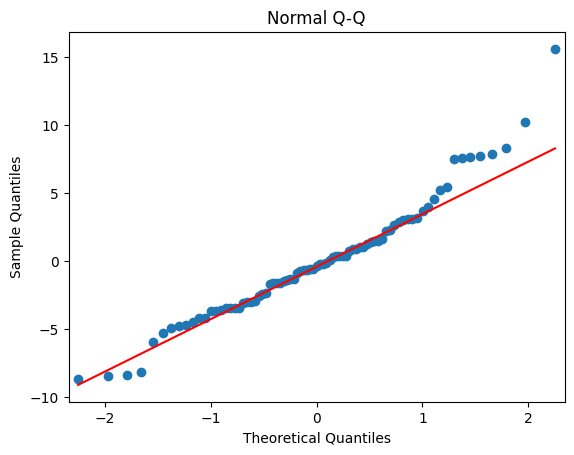

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q')
plt.show()

In [ ]:
import numpy as np
list(np.where(model.resid>10))

[array([ 0, 76])]

In [ ]:
def standard_values(vals):
  return (vals-vals.mean())/vals.std()

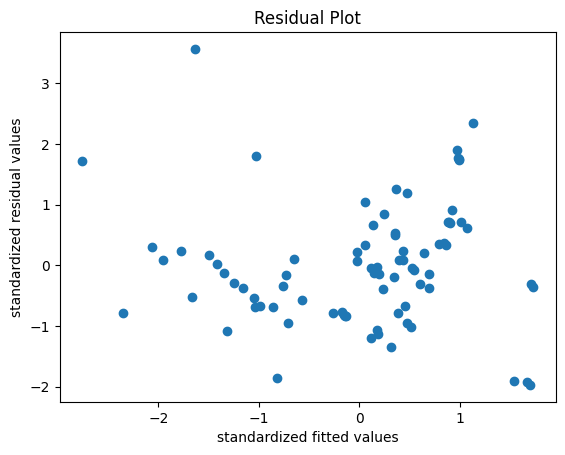

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

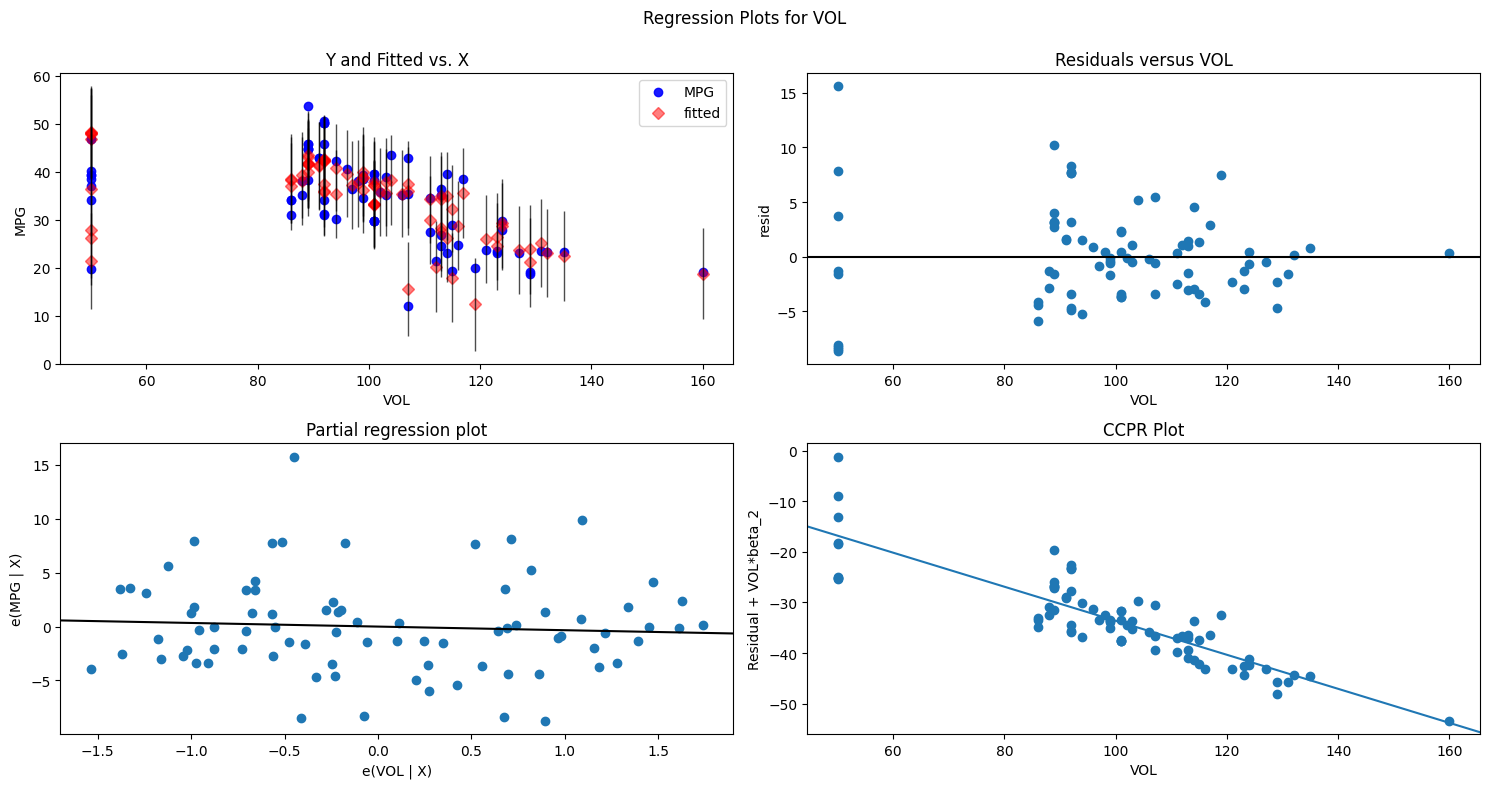

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

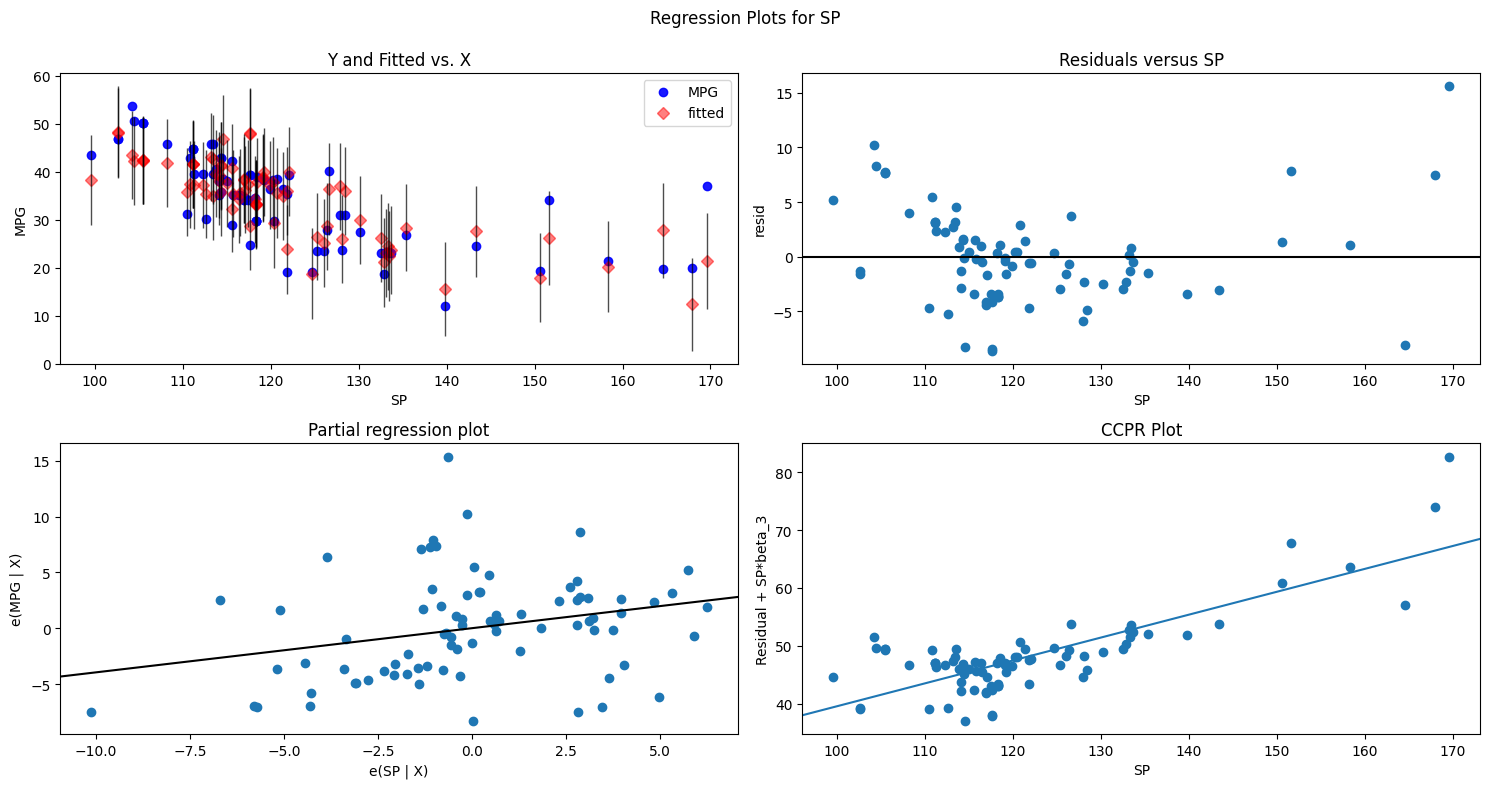

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

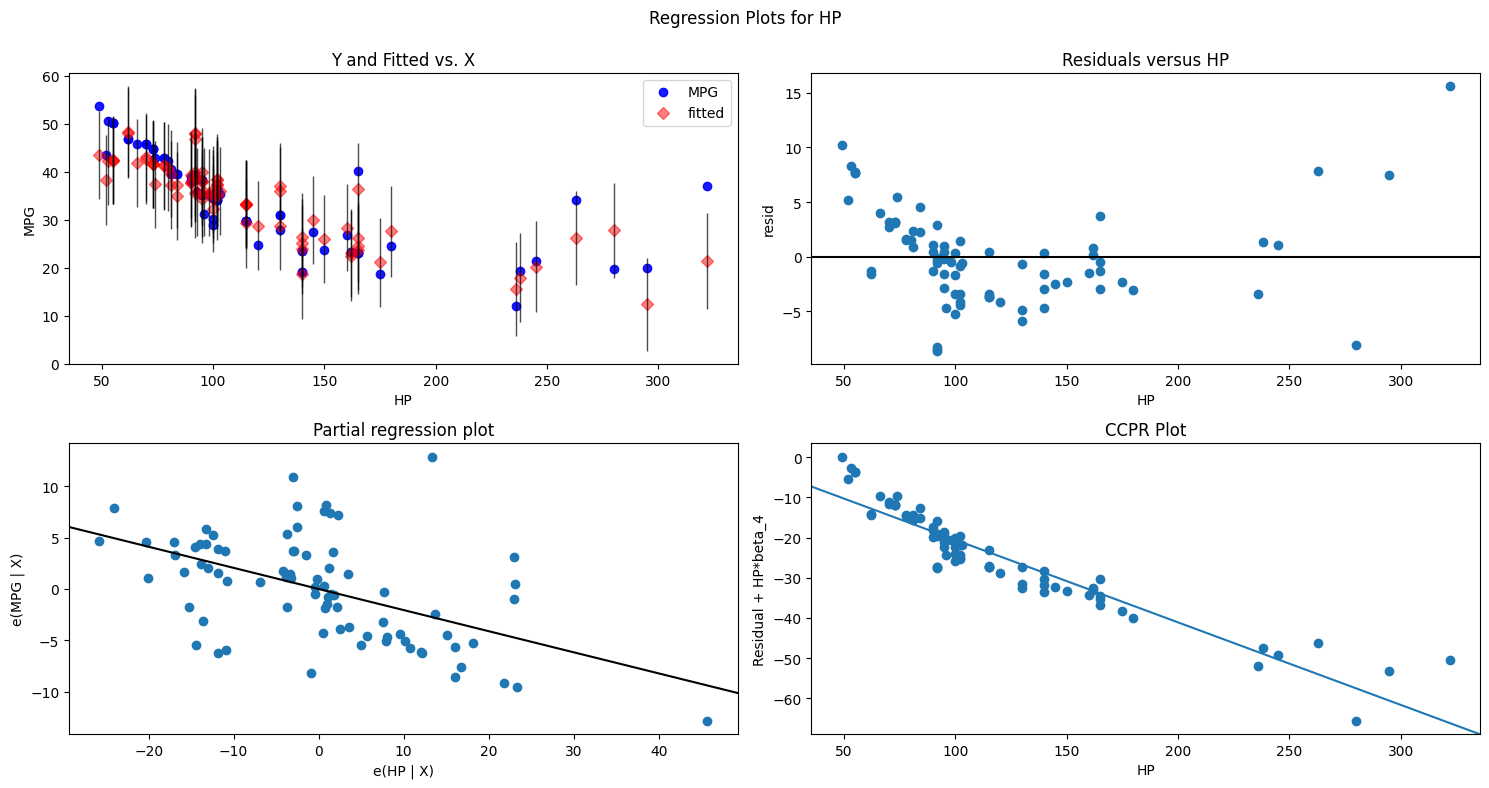

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

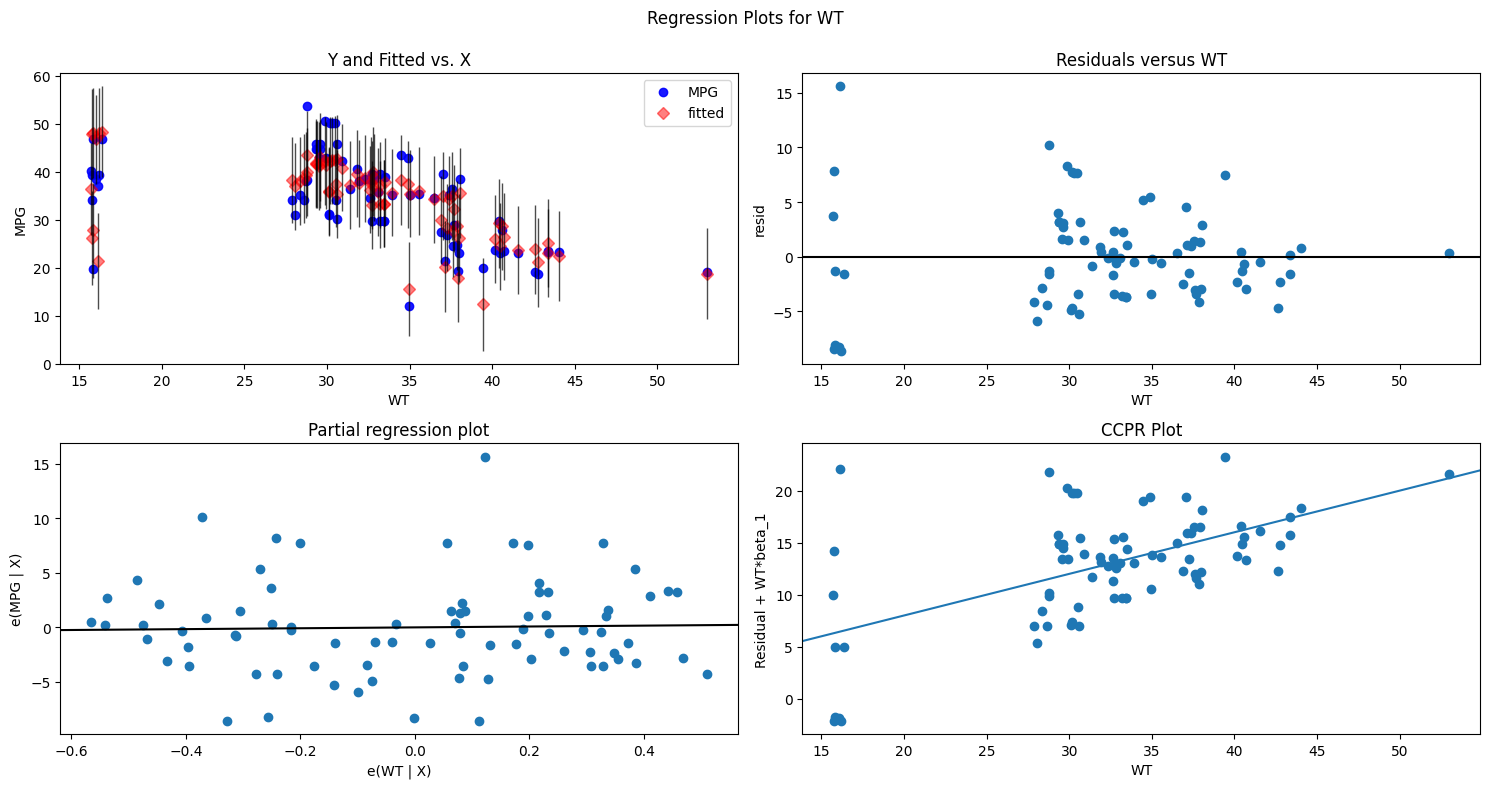

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

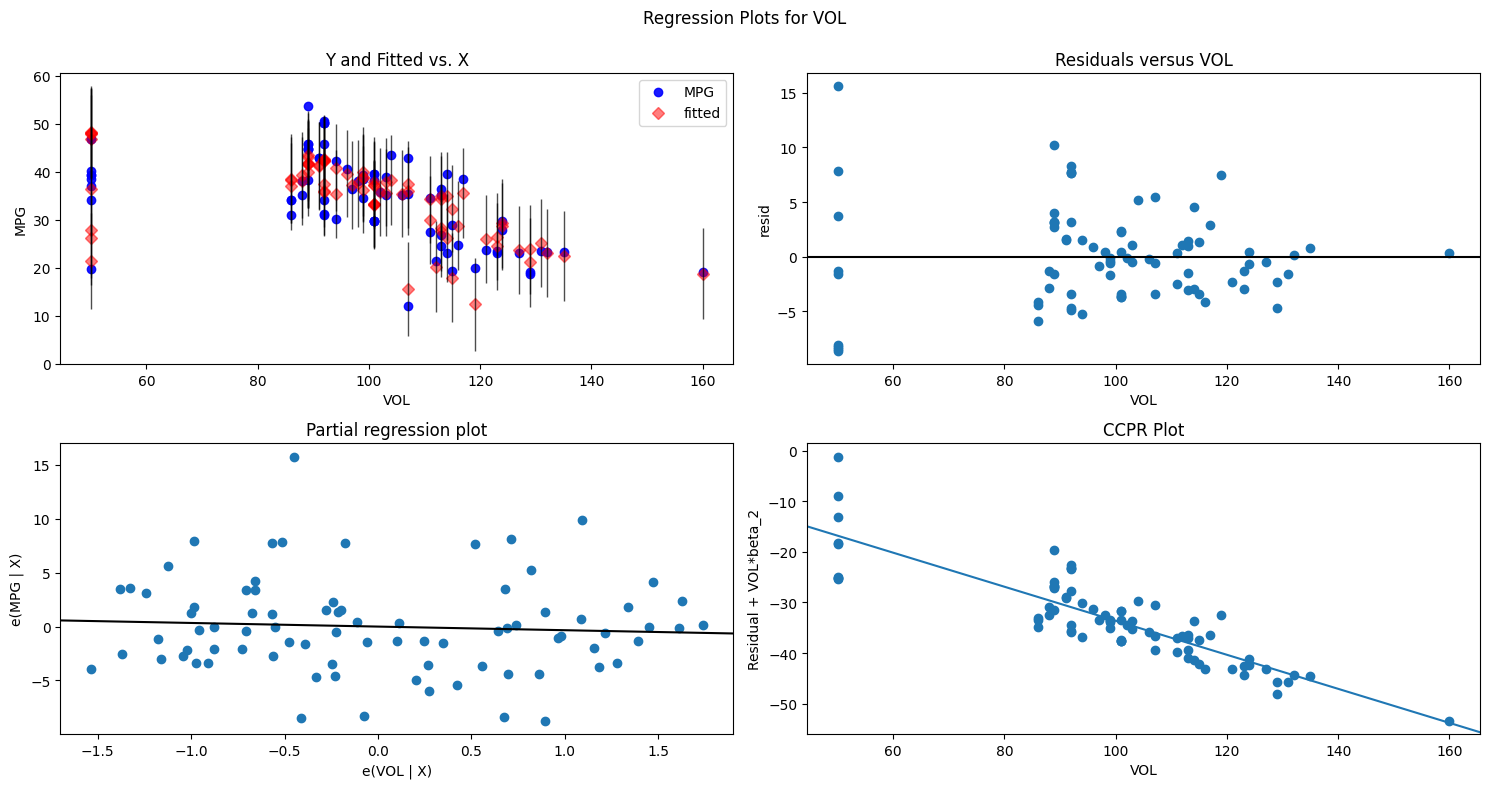

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

In [ ]:
moel_influence=model.get_influence() # COOK'Distance
(c,_)=moel_influence.cooks_distance

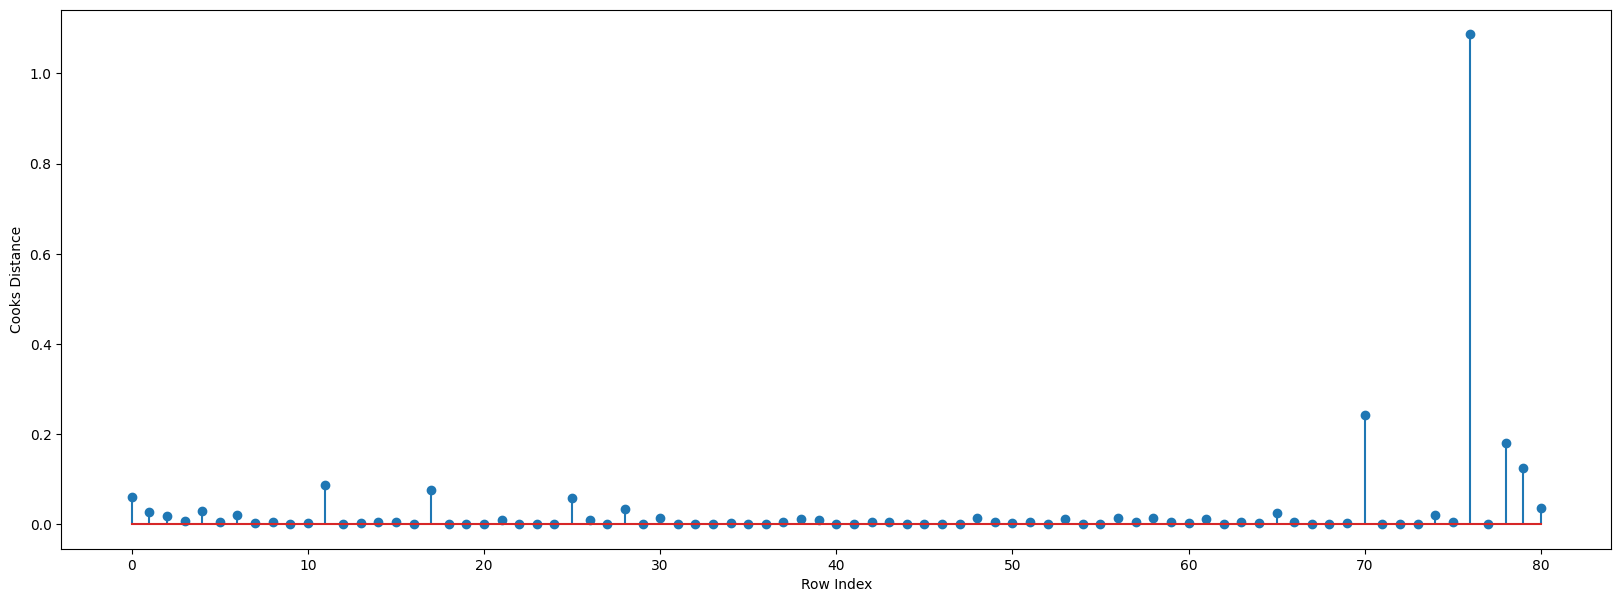

In [ ]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c), np.max(c)

(76, 1.0865193998179699)

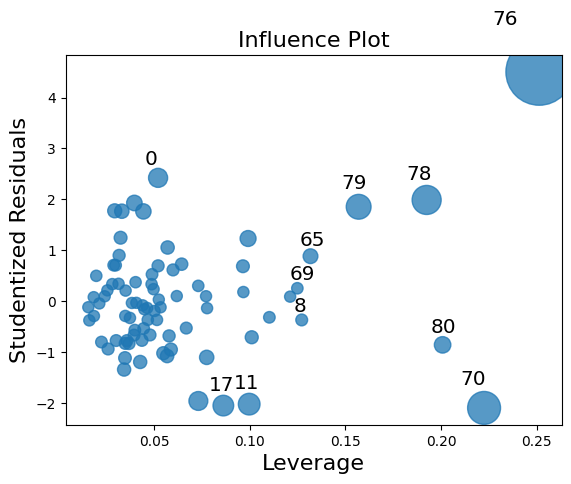

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
df[df.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

file_name=list(uploaded.keys())[0]
cars_new=pd.read_csv(file_name)

Saving Cars.csv to Cars (1).csv


In [ ]:
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [ ]:
car1=car1.drop(['index'],axis=1)

In [ ]:
final_ml_V=smf.ols('MPG~VOL+SP+HP',data=car1).fit()
final_ml_V.rsquared , final_ml_V.aic

(0.8161692010376008, 446.1172263944772)

In [ ]:
final_ml_W=smf.ols('MPG~WT+SP+HP',data=car1).fit()
final_ml_W.rsquared , final_ml_W.aic

(0.8160034320495303, 446.1884323575032)

In [ ]:
data=pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=[1])

In [ ]:
final_ml_V.predict(data)

,0
1,44.055


In [ ]:
final_ml_W.predict(data)

,0
1,41.957485


In [ ]:
final_ml_V.predict(cars_new.iloc[0:5,])

,0
0,44.053224
1,42.694424
2,42.694424
3,42.790029
4,42.711109


In [ ]:
final_ml_V.predict(cars_new)

,0
0,44.053224
1,42.694424
2,42.694424
3,42.790029
4,42.711109
...,...
76,17.510844
77,16.491552
78,23.080092
79,10.371281
